# Импорты

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score

1. Решить задачу регрессии на примере следующих данных:

In [ ]:
x = np.array([6.1101, 5.5277, 8.5186, 7.0032, 5.8598, 8.3829, 7.4764, 8.5781, 6.4862,
              5.0546, 5.7107, 14.164, 5.734, 8.4084, 5.6407, 5.3794, 6.3654, 5.1301,
              6.4296, 7.0708, 6.1891, 20.27, 5.4901, 6.3261, 5.5649, 18.945, 12.828,
              10.957, 13.176, 22.203, 5.2524, 6.5894, 9.2482, 5.8918, 8.2111, 7.9334,
              8.0959, 5.6063, 12.836, 6.3534, 5.4069, 6.8825, 11.708, 5.7737, 7.8247,
              7.0931, 5.0702, 5.8014, 11.7, 5.5416, 7.5402, 5.3077, 7.4239, 7.6031,
              6.3328, 6.3589, 6.2742, 5.6397, 9.3102, 9.4536, 8.8254, 5.1793, 21.279,
              14.908, 18.959, 7.2182, 8.2951, 10.236, 5.4994, 20.341, 10.136, 7.3345,
              6.0062, 7.2259, 5.0269, 6.5479, 7.5386, 5.0365, 10.274, 5.1077, 5.7292,
              5.1884, 6.3557, 9.7687, 6.5159, 8.5172, 9.1802, 6.002, 5.5204, 5.0594,
              5.7077, 7.6366, 5.8707, 5.3054, 8.2934, 13.394, 5.4369])
y = np.array([17.592, 9.1302, 13.662, 11.854, 6.8233, 11.886, 4.3483, 12, 6.5987,
              3.8166, 3.2522, 15.505, 3.1551, 7.2258, 0.71618, 3.5129, 5.3048, 0.56077,
              3.6518, 5.3893, 3.1386, 21.767, 4.263, 5.1875, 3.0825, 22.638, 13.501,
              7.0467, 14.692, 24.147, -1.22, 5.9966, 12.134, 1.8495, 6.5426, 4.5623,
              4.1164, 3.3928, 10.117, 5.4974, 0.55657, 3.9115, 5.3854, 2.4406, 6.7318,
              1.0463, 5.1337, 1.844, 8.0043, 1.0179, 6.7504, 1.8396, 4.2885, 4.9981,
              1.4233, -1.4211, 2.4756, 4.6042, 3.9624, 5.4141, 5.1694, -0.74279, 17.929,
              12.054, 17.054, 4.8852, 5.7442, 7.7754, 1.0173, 20.992, 6.6799, 4.0259,
              1.2784, 3.3411, -2.6807, 0.29678, 3.8845, 5.7014, 6.7526, 2.0576, 0.47953,
              0.20421, 0.67861, 7.5435, 5.3436, 4.2415, 6.7981, 0.92695, 0.152, 2.8214,
              1.8451, 4.2959, 7.2029, 1.9869, 0.14454, 9.0551, 0.61705])

In [ ]:
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
y_pred = model.predict(x)

mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")

MSE: 8.953942751950358
R^2: 0.7020315537841397


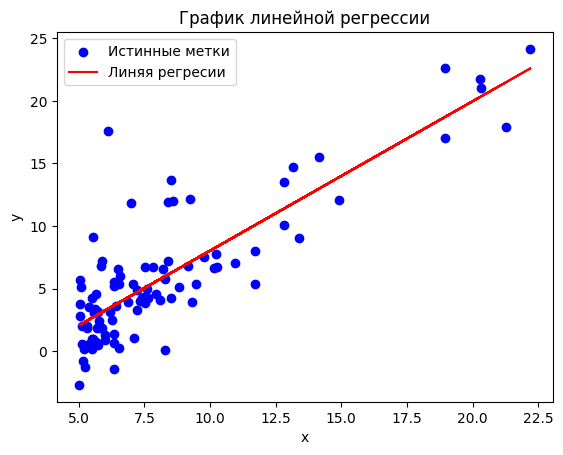

In [ ]:
plt.scatter(x, y, color='blue', label='Истинные метки')
plt.plot(x, y_pred, color='red', label='Линяя регресии')
plt.xlabel('x')
plt.ylabel('y')
plt.title('График линейной регрессии')
plt.legend()
plt.show()

In [ ]:
df = pd.read_csv("/content/possum.csv")
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [ ]:
df = df.dropna()

In [ ]:
df["Pop"].unique() # бесполезный признак

array(['Vic', 'other'], dtype=object)

In [ ]:
df["sex"].value_counts() # 59 к 42 в целом выборку можно считать адекватной

,count
sex,
m,59
f,42


In [ ]:
df['sex'] = df['sex'].replace({'m': 1, 'f': 0})

<ipython-input-10-2b9839190e6a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'m': 1, 'f': 0})
<ipython-input-10-2b9839190e6a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df['sex'].replace({'m': 1, 'f': 0})


In [ ]:
df = df.drop(['case', 'site', 'Pop'], axis=1)

In [ ]:
df.describe()

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.584158,3.821782,92.730693,56.960396,87.269307,37.049505,68.398020,48.133663,15.050495,27.064356,32.638614
std,0.495325,1.915182,3.518714,3.102679,4.196802,1.971681,4.413502,4.060352,1.058643,2.020722,2.727745
min,0.000000,1.000000,82.500000,50.000000,75.000000,32.000000,60.300000,41.300000,12.800000,22.000000,25.000000
25%,0.000000,2.000000,90.700000,55.000000,84.500000,36.000000,64.500000,44.800000,14.400000,25.500000,31.000000
50%,1.000000,3.000000,92.900000,56.400000,88.000000,37.000000,67.900000,46.800000,14.900000,27.000000,32.500000
75%,1.000000,5.000000,94.800000,58.100000,90.000000,38.000000,72.500000,52.000000,15.700000,28.000000,34.000000
max,1.000000,9.000000,103.100000,68.600000,96.500000,43.000000,77.900000,56.200000,17.800000,32.000000,40.000000


In [ ]:
df.head()

,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,0,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,0,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,0,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,0,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


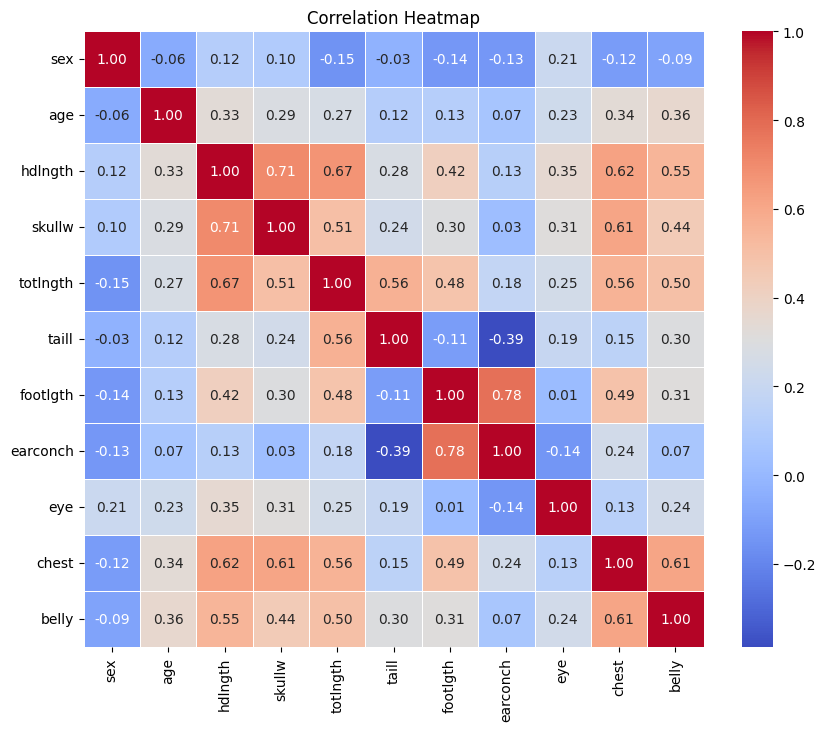

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
features = ["sex", "age", "hdlngth", "skullw", "totlngth", "footlgth", "earconch", "eye", "chest", "belly"]

In [ ]:
X = df[features]
y = df['taill']
print(X.shape, y.shape)

(101, 10) (101,)


In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

In [ ]:
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f'MSE: {mse}, R^2: {r2}')

MSE: 1.5507481576685487, R^2: 0.5971072240124066


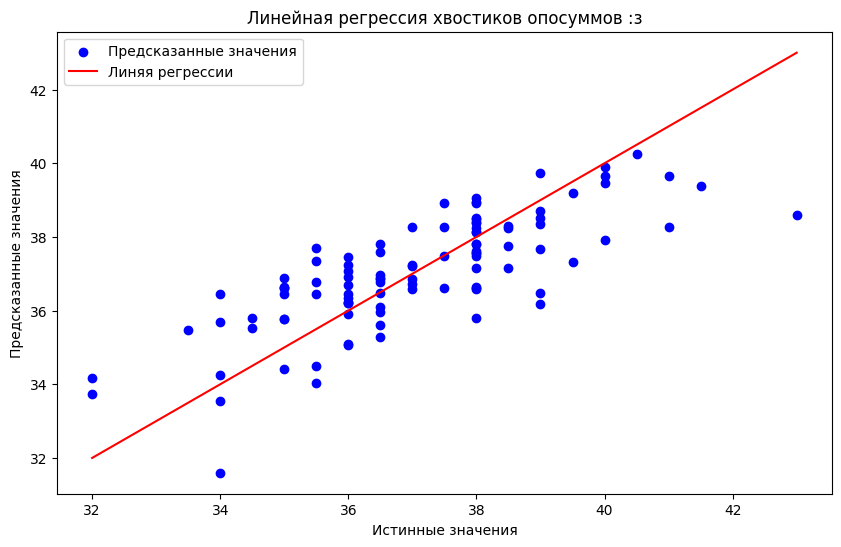

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue', label='Предсказанные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', label='Линяя регрессии')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Линейная регрессия хвостиков опосуммов :з')
plt.legend()
plt.show()

In [ ]:
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
y_pred_lasso = lasso.predict(X)
mse_lasso = mean_squared_error(y, y_pred_lasso)
r2_lasso = r2_score(y, y_pred_lasso)
print(f'Лассо MSE: {mse_lasso}, R^2: {r2_lasso}')

Лассо MSE: 1.57471322266825, R^2: 0.5908809702414726


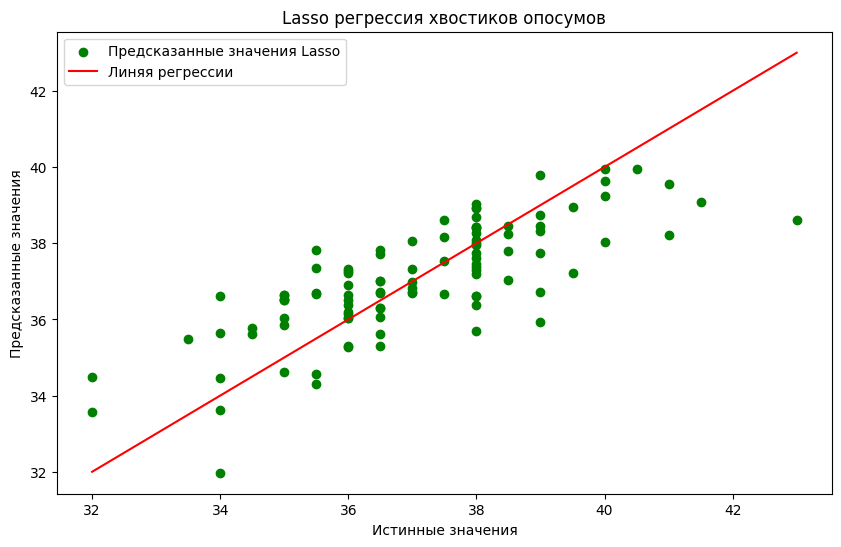

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_lasso, color='green', label='Предсказанные значения Lasso')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', label='Линяя регрессии')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Lasso регрессия хвостиков опосумов')
plt.legend()
plt.show()

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(X, y)
y_pred_ridge = ridge.predict(X)
mse_ridge = mean_squared_error(y, y_pred_ridge)
r2_ridge = r2_score(y, y_pred_ridge)
print(f'Ridge MSE: {mse_ridge}, R^2: {r2_ridge}')

Ridge MSE: 1.5507484499905304, R^2: 0.5971071480655714


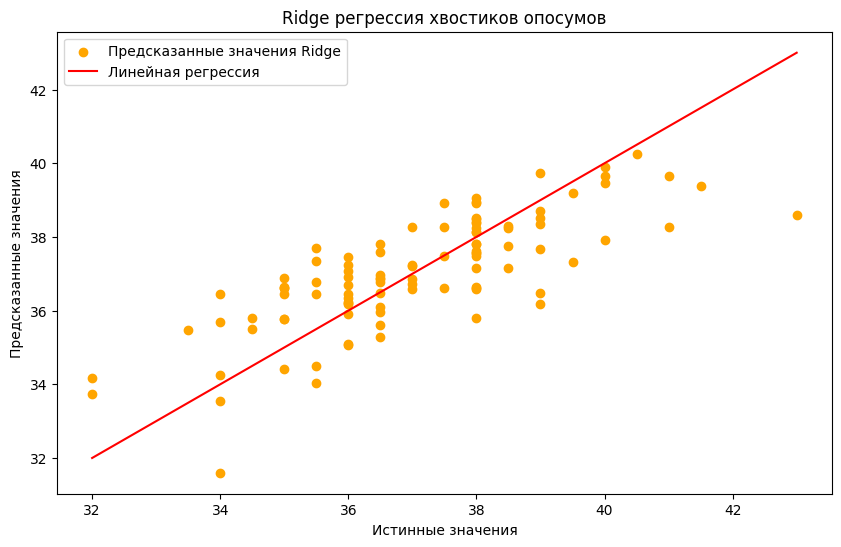

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_ridge, color='orange', label='Предсказанные значения Ridge')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', label='Линейная регрессия')
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('Ridge регрессия хвостиков опосумов')
plt.legend()
plt.show()